##Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing packages for the further analysis
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the Breast Cancder Dataset

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/random_survival_forest/data/raw/wpbc.data", header=None)

In [4]:
# Displaying the contents of the dataframe
print(df)

         0  1    2      3      4   ...       30      31       32   33  34
0    119513  N   31  18.02  27.60  ...  0.11700  0.2677  0.08113  5.0   5
1      8423  N   61  17.99  10.38  ...  0.26540  0.4601  0.11890  3.0   2
2    842517  N  116  21.37  17.44  ...  0.20320  0.4334  0.09067  2.5   0
3    843483  N  123  11.42  20.38  ...  0.25750  0.6638  0.17300  2.0   0
4    843584  R   27  20.29  14.34  ...  0.16250  0.2364  0.07678  3.5   0
..      ... ..  ...    ...    ...  ...      ...     ...      ...  ...  ..
193  942640  N   10  22.52  21.92  ...  0.09378  0.2061  0.05788  6.0   2
194  943471  N    8  15.44  31.18  ...  0.12860  0.2914  0.08024  1.5   0
195   94547  N   12  17.17  29.19  ...  0.09520  0.3362  0.06033  3.7   0
196  947204  R    3  21.42  22.84  ...  0.22150  0.2832  0.08981  3.0   ?
197  947489  N    6  16.70  28.13  ...  0.13170  0.3035  0.08036  3.5   0

[198 rows x 35 columns]


In [5]:
# Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       198 non-null    int64  
 1   1       198 non-null    object 
 2   2       198 non-null    int64  
 3   3       198 non-null    float64
 4   4       198 non-null    float64
 5   5       198 non-null    float64
 6   6       198 non-null    float64
 7   7       198 non-null    float64
 8   8       198 non-null    float64
 9   9       198 non-null    float64
 10  10      198 non-null    float64
 11  11      198 non-null    float64
 12  12      198 non-null    float64
 13  13      198 non-null    float64
 14  14      198 non-null    float64
 15  15      198 non-null    float64
 16  16      198 non-null    float64
 17  17      198 non-null    float64
 18  18      198 non-null    float64
 19  19      198 non-null    float64
 20  20      198 non-null    float64
 21  21      198 non-null    float64
 22  22

# Data Preprocessing

In [6]:
# Making the X Dataframe
id = df.iloc[:,0]
status = df.iloc[:,1]
time = df.iloc[:,2]
X = df.drop(df.columns[[0,1,2]], axis = 1)
X = X.drop(X.columns[-1], axis = 1)

# Making the Y Dataframe
Y = pd.DataFrame({"status": status, "time" : time})
Y["status"] = Y["status"].replace(["N"],0).replace(["R"],1)

In [7]:
# Printing the information of the X Dataframe
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3       198 non-null    float64
 1   4       198 non-null    float64
 2   5       198 non-null    float64
 3   6       198 non-null    float64
 4   7       198 non-null    float64
 5   8       198 non-null    float64
 6   9       198 non-null    float64
 7   10      198 non-null    float64
 8   11      198 non-null    float64
 9   12      198 non-null    float64
 10  13      198 non-null    float64
 11  14      198 non-null    float64
 12  15      198 non-null    float64
 13  16      198 non-null    float64
 14  17      198 non-null    float64
 15  18      198 non-null    float64
 16  19      198 non-null    float64
 17  20      198 non-null    float64
 18  21      198 non-null    float64
 19  22      198 non-null    float64
 20  23      198 non-null    float64
 21  24      198 non-null    float64
 22  25

In [8]:
# Printing the information of the Y Dataframe
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  198 non-null    int64
 1   time    198 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB
None


In [9]:
# Adding column names to the X dataset
X.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
              

In [10]:
# Dividing the dataset into training, validation and testing sets
from sklearn.model_selection import train_test_split

# Randomly splitting the data into training and testing in a ratio of 4:1
X_train_whole, X_test, Y_train_whole, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 20)

In [11]:
# Performing normalization and scaling on the training dataframe

# Importing necessary packages
import numpy as np
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import StandardScaler

# Initializing the object for MinMaxScaler
scaling = MinMaxScaler()

# Fitting the data and performing the normalization
scaled = scaling.fit_transform(X_train_whole)

# Converting the normalized array to dataframe
X_train_scaled = pd.DataFrame(scaled)

# Initializing the object for StandardScaler
scaling = StandardScaler()

# Fitting the data and performing the scaling
scaled = scaling.fit_transform(X_train_scaled)

# Converting the scaled array to dataframe
X_train_scaled = pd.DataFrame(scaled)

# Setting the row and the column indices for the X_train_scaled dataframes
X_train_scaled.index = X_train_whole.index
X_train_scaled.columns = X_train_whole.columns

# Converting Y_train to dataframe
Y_train_whole = pd.DataFrame(Y_train_whole)

# Concatenating the X_train_scaled and Y_train dataframes
train_scaled = pd.concat([X_train_scaled, Y_train_whole], axis=1)

# Displaying the normalized and scaled dataframe
print(train_scaled)

            1         2         3         4  ...        30        31  status  time
150  0.124505  1.268599  0.132562  0.046072  ...  0.013718 -0.730130       1    16
122  0.272888 -0.808204  0.197804  0.174344  ... -0.386641 -0.464934       0    70
44  -0.813150  0.341293 -0.794799 -0.839123  ... -0.061149 -0.889248       0   106
133  0.973762 -0.148433  0.901480  0.925898  ... -1.054516 -0.995327       0    61
197 -0.206989  1.291272 -0.193645 -0.225731  ... -0.460596  0.330657       0     6
..        ...       ...       ...       ...  ...       ...       ...     ...   ...
148 -0.027035  0.676847 -0.095783 -0.103109  ... -0.502595  3.247821       0    13
137 -1.981272 -0.817273 -1.917885 -1.705669  ...  2.275729 -0.464934       0     7
156 -0.210146 -0.506659 -0.342769 -0.304276  ... -0.649135 -0.199737       0    36
15  -0.386943 -0.397831 -0.296168 -0.470409  ...  1.084236  0.065460       1    10
99   1.848275  1.028271  1.819522  1.991069  ... -0.167973 -0.730130       0    83

[15

In [12]:
# Randomly splitting the training set into training and validation set in a ratio of 4:1
X_train, X_val, Y_train, Y_val = train_test_split(X_train_whole, Y_train_whole, test_size=0.25, random_state=1)

In [13]:
# Converting the response variable of the training dataframe to structured array
arr_train_whole = Y_train_whole.to_records(index=False)

# Converting the response variable of the training dataframe to structured array
arr_train = Y_train.to_records(index=False)

# Converting the response variable of the validation dataframe to structured array
arr_val = Y_val.to_records(index=False)

# Converting the response variable of the test dataframe to structured array
arr_test = Y_test.to_records(index=False)

# Model Building - ANN

In [14]:
# Checkig the Keras installation
import os
# Setting the environment variable
os.environ["KERAS_BACKEND"] = "tensorflow"
# Make sure we were successful
print(os.environ.get("KERAS_BACKEND"))

tensorflow


In [15]:
# Initalizing tensorflow
# Limit GPU Usage
import tensorflow as tf
config = tf.compat.v1.ConfigProto() # Tensorflow 2.0 version
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [16]:
# Importing necessary packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import numpy as np
from sklearn.metrics import confusion_matrix
import urllib
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
# ANN Initialization
clf = Sequential()

# Number of input variables  = number of features = 31
# Number of nodes in first hidden layer = (31+1)/2  = 16; chosen as per best practises.

# Adding the input layer and the first hidden layer
clf.add(Dense(input_dim=31, units=16, kernel_regularizer = regularizers.l1_l2(l1 = 1e-7, l2 = 1e-5) ,kernel_initializer='LecunNormal', activation='selu'))

# Adding dropout to prevent overfitting
clf.add(Dropout(rate=0.1))

# Adding the output layer and using the sigmoid activtion function to obtain the output
clf.add(Dense(units=1, kernel_initializer='LecunNormal', activation='selu', name="output"))

clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                512       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [18]:
def negative_log_likelih_cox(yTrue,yPred):
  """
  deep learning version of the cox-proportional hazards marginal log-likelihood for tensorflow

  Ref: Katzman, J., Shaham, U., Bates, J., Cloninger, A., Jiang, T., Kluger, Y., 2018. 
  DeepSurv: Personalized Treatment Recommender System Using A Cox Proportional Hazards 
  Deep Neural Network. BMC Medical Research Methodology 18. https://doi.org/10.1186/s12874-018-0482-1

  see also https://keras.io/api/losses/#creating-custom-losses
  

  """
  # custom loss function: 
  # partial negative log likelihood of the cox proportional harzards model
  yStatus = yTrue[:,0]
  yTime = yTrue[:,1]
  
  def fun_logsumexp(i, yPred, yTime):
      j_mask = tf.greater_equal(yTime,i)
      yPred_masked = tf.boolean_mask(yPred,j_mask)
      logsumexp_ = tf.reduce_logsumexp(yPred_masked) # reduce_logsumexp?
      return logsumexp_
  
  logsumexp = tf.map_fn(lambda i: fun_logsumexp(i,yPred,yTime), yTime) 
  
  # each tensor is 1D with shape (n,)
  # after expand dim it's (n,1)
  # after concatenation it's (n,3)
  # -> enable usage tf.map_fn for computations along the n's
  yStatus = tf.expand_dims(yStatus,1)
  logsumexp = tf.expand_dims(logsumexp,1)
  d_theta_nls = tf.concat([yStatus, yPred, logsumexp], axis=1)
  
  def fun_loglikelihood_i(x):
      loss_i = x[0] * (x[1] - x[2]) # = d_i * (theta_i - logsumexp_i)
      return loss_i
  
  log_likelih_summands = tf.map_fn(lambda x: fun_loglikelihood_i(x), d_theta_nls)
  loss = -tf.reduce_mean(log_likelih_summands)    
  return loss

In [19]:
# Compiling the network developed
# Optimizer = 'nadam' is chosen

opt = keras.optimizers.Nadam(learning_rate=0.01)
clf.compile(optimizer=opt, loss = negative_log_likelih_cox, metrics=['accuracy'])

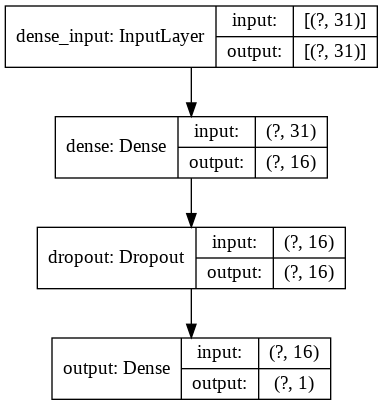

In [20]:
# Plotting the model
tf.keras.utils.plot_model(clf, show_layer_names=True, show_shapes=True)

In [21]:
# Mentioning the early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [22]:
x_train = np.asarray(X_train).astype(np.float32)
x_val = np.asarray(X_val).astype(np.float32)

In [23]:
Y_train = Y_train.astype("float64")
Y_val = Y_val.astype("float64")

In [24]:
# Fitting the network
d = clf.fit(x_train, Y_train,validation_split= 0.2, batch_size=10,epochs=200, callbacks=[es])

Epoch 1/200
10/10 [==============================] - 0s 48ms/step - loss: 0.3761 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3834 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3804 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 8/200


In [25]:
# Displaying the loss for the last epoch
print("The loss for the last epoch is " + str(d.history.get('loss')[-1]))

# Displaying the accuracy for the last epoch
print("The accuracy for the last epoch is " + str(d.history.get('accuracy')[-1]))

The loss for the last epoch is 0.36859604716300964
The accuracy for the last epoch is 0.3989361822605133


# Hyperparameter Optimization

### Using Optuna

In [26]:
!pip install optuna
import optuna

In [27]:
def objective(trial):
    
    """ Step 2.1. Define parameters to try using methods of optuna.trial such as 
    suggest_categorical. In this simple demo, try 2*2*2*2 = 16 parameter sets: 
    2 values specified in list for each of 4 parameters 
    (filters, kernel_size, strides, and activation for convolution).
    """    
    clf = Sequential()
    clf.add(Dense(
        input_dim=31, units=16, 
        kernel_regularizer = regularizers.l1_l2(l1 = 1e-7, l2 = 1e-5),
        kernel_initializer='LecunNormal', 
        activation='selu'))
    
    clf.add(Dense(units=1, kernel_initializer='LecunNormal', activation='selu', name="output"))

    num_layers = trial.suggest_int('num_layers', 2, 10)

    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 1.0)

    init_mode = trial.suggest_categorical('init_mode',['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])

    activation = trial.suggest_categorical('activation',['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid'])

    drop_path_rate = trial.suggest_discrete_uniform('drop_path_rate', 0.0, 1.0, 0.1)

    optimizer = trial.suggest_categorical('optimizer',['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])

    batch_size = trial.suggest_int('batch_size',1,100)
    epochs = trial.suggest_int('epochs',10,100)

    learning_rate_init = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    opt = keras.optimizers.Nadam(learning_rate=learning_rate_init)
    clf.compile(optimizer=opt,loss = negative_log_likelih_cox, metrics=['accuracy'])
    d = clf.fit(x_train, Y_train,validation_split= 0.2, batch_size=10,epochs=200)
   
    return d.history['val_loss'][-1] # only the last value = end of epoch without batch losses


In [28]:
study = optuna.create_study()
study.optimize(objective, timeout= 1 * 60)

Epoch 1/200
10/10 [==============================] - 0s 33ms/step - loss: 0.3629 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3776 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3528 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3600 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3929 - accuracy: 0.3989 - val_loss: 0.3214 - val_accuracy: 0.4167
Epoch 8/200


[I 2020-08-06 19:44:04,531] Trial 0 finished with value: 0.3214263617992401 and parameters: {'num_layers': 7, 'dropout_rate': 0.822277016700587, 'init_mode': 'he_normal', 'activation': 'relu', 'drop_path_rate': 0.4, 'optimizer': 'RMSprop', 'batch_size': 30, 'epochs': 72, 'learning_rate': 0.003125808627057681}. Best is trial 0 with value: 0.3214263617992401.


Epoch 1/200
10/10 [==============================] - 0s 34ms/step - loss: 3.2582 - accuracy: 0.3670 - val_loss: 6.7279 - val_accuracy: 0.3958
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.3883 - val_loss: 2.7324 - val_accuracy: 0.3958
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.3936 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3728 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3597 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3517 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 8/200


[I 2020-08-06 19:44:21,560] Trial 1 finished with value: 0.3215019106864929 and parameters: {'num_layers': 6, 'dropout_rate': 0.21160560175252519, 'init_mode': 'zero', 'activation': 'softplus', 'drop_path_rate': 0.9, 'optimizer': 'Nadam', 'batch_size': 77, 'epochs': 50, 'learning_rate': 0.0009808564488183694}. Best is trial 0 with value: 0.3214263617992401.


Epoch 1/200
10/10 [==============================] - 0s 35ms/step - loss: 2.1624 - accuracy: 0.3883 - val_loss: 1.8794 - val_accuracy: 0.3958
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4852 - accuracy: 0.3936 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3483 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3644 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3908 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 8/200


[I 2020-08-06 19:44:38,712] Trial 2 finished with value: 0.3214809000492096 and parameters: {'num_layers': 10, 'dropout_rate': 0.6364488082754983, 'init_mode': 'normal', 'activation': 'softplus', 'drop_path_rate': 0.7000000000000001, 'optimizer': 'SGD', 'batch_size': 24, 'epochs': 20, 'learning_rate': 0.0021973471911671517}. Best is trial 0 with value: 0.3214263617992401.


Epoch 1/200
10/10 [==============================] - 0s 34ms/step - loss: 19.8323 - accuracy: 0.1170 - val_loss: 37.6414 - val_accuracy: 0.0833
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 19.9104 - accuracy: 0.1170 - val_loss: 37.2147 - val_accuracy: 0.0833
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 19.6842 - accuracy: 0.1170 - val_loss: 36.7559 - val_accuracy: 0.0833
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 17.3311 - accuracy: 0.1170 - val_loss: 36.3014 - val_accuracy: 0.0833
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 15.9645 - accuracy: 0.1170 - val_loss: 35.8949 - val_accuracy: 0.0833
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 17.6376 - accuracy: 0.1170 - val_loss: 35.5727 - val_accuracy: 0.0833
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 19.2320 - accuracy: 0.1170 - val_loss: 35.2760 - val_accuracy: 0.083

[I 2020-08-06 19:44:56,160] Trial 3 finished with value: 0.4291402995586395 and parameters: {'num_layers': 10, 'dropout_rate': 0.5791456554036449, 'init_mode': 'uniform', 'activation': 'relu', 'drop_path_rate': 0.6000000000000001, 'optimizer': 'Nadam', 'batch_size': 25, 'epochs': 31, 'learning_rate': 0.00010546687225771394}. Best is trial 0 with value: 0.3214263617992401.


In [29]:
""" Show Results """
print('Best trial number: ', study.best_trial.number)
print('Best value:', study.best_trial.value)
print('Best parameters: \n', study.best_trial.params)

Best trial number:  0
Best value: 0.3214263617992401
Best parameters: 
 {'num_layers': 7, 'dropout_rate': 0.822277016700587, 'init_mode': 'he_normal', 'activation': 'relu', 'drop_path_rate': 0.4, 'optimizer': 'RMSprop', 'batch_size': 30, 'epochs': 72, 'learning_rate': 0.003125808627057681}


# Using Grid Search

In [48]:
# Defining the hyperparameters

reg =[[1e-7, 1e-5], [1e-2, 1e-4], [1e-9,1e-3]]

lr=[0.001,0.01,0.05,0.1,0.5,0.7,0.9]

In [49]:

# Tuning the hyperparameters

# This list stores the best accuracy scores
acc=[]

# This list stores the best hp value for reg
reg_val=[]

# This list stores the best hp value for learning rate
opt_val=[]

for param1 in reg:
  for param2 in lr:
    clf = Sequential()
    clf.add(Dense(input_dim=31, units=16, kernel_regularizer = regularizers.l1_l2(l1 = param1[0], l2 = param1[1]) ,kernel_initializer='LecunNormal', activation='selu'))
    clf.add(Dense(units=1, kernel_initializer='LecunNormal', activation='selu', name="output"))
    opt = keras.optimizers.Nadam(learning_rate=param2)
    clf.compile(optimizer=opt, loss = negative_log_likelih_cox, metrics=['accuracy'])
    d = clf.fit(x_train, Y_train,validation_split= 0.2, batch_size=10,epochs=200, callbacks=[es])
    acc.append(d.history.get('accuracy')[-1])
    reg_val.append(param1)
    opt_val.append(param2)

Epoch 1/200
10/10 [==============================] - 0s 32ms/step - loss: 0.3597 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3612 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3756 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3645 - accuracy: 0.3989 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3774 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 8/200


In [92]:
# Printing the highest accuracy
print("Highest accuracy is "+ str(max(acc)))

# Printing the hyperparameters having highet acuracy
print("Optimum kernel regularizer is "+ str(reg_val[acc.index(max(acc))]))
print("Optimum learning rate is "+ str(opt_val[acc.index(max(acc))]))

Highest accuracy is 0.3989361822605133
Optimum kernel regularizer is [1e-07, 1e-05]
Optimum learning rate is 0.001


# Building Model from the chosen Hyperparameters

In [84]:
# ANN Initialization
clf = Sequential()

# Number of input variables  = number of features = 31
# Number of nodes in first hidden layer = (31+1)/2  = 16; chosen as per best practises.

# Adding the input layer and the first hidden layer
clf.add(Dense(input_dim=31, units=16, kernel_regularizer = regularizers.l1_l2(l1 = 1e-7, l2 = 1e-5) ,kernel_initializer='LecunNormal', activation='selu'))

# Adding dropout to prevent overfitting
clf.add(Dropout(rate=0.1))

# Adding the output layer and using the sigmoid activtion function to obtain the output
clf.add(Dense(units=1, kernel_initializer='LecunNormal', activation='selu', name="output"))

clf.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 16)                512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compiling the network developed
# Optimizer = 'nadam' is chosen

opt = keras.optimizers.Nadam(learning_rate=0.01)
clf.compile(optimizer=opt, loss = negative_log_likelih_cox, metrics=['accuracy'])

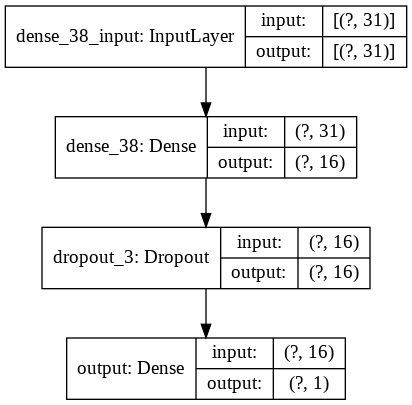

In [86]:
# Plotting the model
tf.keras.utils.plot_model(clf, show_layer_names=True, show_shapes=True)

In [87]:
# Fitting the network
d = clf.fit(x_train, Y_train,validation_split= 0.2, batch_size=10,epochs=200, callbacks=[es])

Epoch 1/200
10/10 [==============================] - 0s 35ms/step - loss: 16.7247 - accuracy: 0.2872 - val_loss: 0.3216 - val_accuracy: 0.4167
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 2.3120 - accuracy: 0.3936 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3420 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3597 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3518 - accuracy: 0.3989 - val_loss: 0.3215 - val_accuracy: 0.4167
Epoch 8/200

In [88]:
# Displaying the loss for the last epoch
print("The loss for the last epoch is " + str(d.history.get('loss')[-1]))

# Displaying the accuracy for the last epoch
print("The accuracy for the last epoch is " + str(d.history.get('accuracy')[-1]))

The loss for the last epoch is 0.35963204503059387
The accuracy for the last epoch is 0.3989361822605133


In [65]:
!pip install lifelines

     |████████████████████████████████| 348kB 2.8MB/s 


In [71]:
from lifelines.utils import concordance_index
cindex = concordance_index(Y_val['time'], -clf.predict(X_val), Y_val['status'])
print("The cindex is " + str(cindex))

The cindex is 0.5


# Saving Model

In [89]:
clf.save('/content/drive/My Drive/Colab Notebooks/random_survival_forest/models/ANN')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/random_survival_forest/models/ANN/assets


# Testing

In [72]:
# ANN Initialization
clf = Sequential()

# Number of input variables  = number of features = 31
# Number of nodes in first hidden layer = (31+1)/2  = 16; chosen as per best practises.

# Adding the input layer and the first hidden layer
clf.add(Dense(input_dim=31, units=16, kernel_regularizer = regularizers.l1_l2(l1 = 1e-7, l2 = 1e-5) ,kernel_initializer='LecunNormal', activation='selu'))

# Adding dropout to prevent overfitting
clf.add(Dropout(rate=0.1))

# Adding the output layer and using the sigmoid activtion function to obtain the output
clf.add(Dense(units=1, kernel_initializer='LecunNormal', activation='selu', name="output"))

clf.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compiling the network developed
# Optimizer = 'nadam' is chosen

opt = keras.optimizers.Nadam(learning_rate=0.01)
clf.compile(optimizer=opt, loss = negative_log_likelih_cox, metrics=['accuracy'])

In [ ]:
# Plotting the model
tf.keras.utils.plot_model(clf, show_layer_names=True, show_shapes=True)

In [76]:
# Fitting the network
d = clf.fit(x_train_whole, Y_train_whole,validation_split= 0.2, batch_size=10,epochs=200, callbacks=[es])

Epoch 1/200
13/13 [==============================] - 0s 8ms/step - loss: 0.4119 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4183 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.3929 - val_loss: 0.4284 - val_accuracy: 0.3750
Epoch 8/200
1

In [78]:
cindex = concordance_index(Y_test['time'], -clf.predict(X_test), Y_test['status'])
print("The cindex is " + str(cindex))

The cindex is 0.5


# Summary

*   Two hyperparameters chosen are  kernel_regularizer l1_l2 and learning rate with values [ 1e-07, 1e-05 ] and 0.001 respectively.

*   The c-index value for using the best chosen hyperparameters is 0.5 for the validation dataset

*   The c-index value for the test dataset is 0.5



# Comparison with the Coxph and Rsf



Comparing the cindex of all the three methods, it is clear that conxph outperforms other two techniques.

The comparison table is placed in the following path:

/content/drive/My Drive/Colab Notebooks/random_survival_forest/reports/figures/fig.png